# CNN-based image classification on CIFAR-100 dataset

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. See more info at the CIFAR homepage (https://www.cs.toronto.edu/~kriz/cifar.html).

The dataset is available through most of the deep-learnign frameworks like: Keras (https://keras.io/api/datasets/cifar10/), Pytorch (https://pytorch.org/vision/0.8/datasets.html#cifar)

You need to:
    1. Peform 10-class classification using CNNs
    2. Report the results in terms of accuracy and other useful metrics
    3. Please make sure to assign 20% of the training set to be validation set for hyper-parameter tuning. 
    4. Use random seed '777' whereever needed (like taking out 20% data from training set as validation set) for reproducability.

In [1]:
import tensorflow as tf
import tensorflow.keras as keras


In [2]:
from tensorflow.keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


In [3]:
test_images.shape

(10000, 32, 32, 3)

In [4]:
train_images = train_images.reshape((50000, 32, 32, 3))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 32, 32, 3))
test_images = test_images.astype('float32') / 255

In [15]:
from tensorflow.keras import layers
inputs = keras.Input(shape=(32,32,3))
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)

x = layers.Flatten()(x)
outputs = layers.Dense(10, activation='softmax')(x)
model = keras.Model(inputs = inputs, outputs = outputs)

In [16]:
model.summary()

model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer='rmsprop', 
    metrics=['accuracy']  
)


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0   

In [17]:
callbacks = [keras.callbacks.ModelCheckpoint(
            filepath = 'convnet_from_scratch.keras',
            save_best_only = True,
            monitor = 'val_loss')
            ]

In [18]:
history = model.fit(train_images, train_labels, 
                    epochs=20, batch_size = 64, 
                    callbacks=callbacks, validation_split = 0.2)

Epoch 1/20
625/625 [==============================] - 160s 246ms/step - loss: 1.9252 - accuracy: 0.2854 - val_loss: 1.4853 - val_accuracy: 0.4774
Epoch 2/20
625/625 [==============================] - 148s 237ms/step - loss: 1.3609 - accuracy: 0.5121 - val_loss: 1.2187 - val_accuracy: 0.5717
Epoch 3/20
625/625 [==============================] - 149s 238ms/step - loss: 1.1336 - accuracy: 0.6026 - val_loss: 1.0244 - val_accuracy: 0.6347
Epoch 4/20
625/625 [==============================] - 148s 237ms/step - loss: 0.9925 - accuracy: 0.6513 - val_loss: 0.9993 - val_accuracy: 0.6585
Epoch 5/20
625/625 [==============================] - 149s 238ms/step - loss: 0.8688 - accuracy: 0.6943 - val_loss: 0.9144 - val_accuracy: 0.6809
Epoch 6/20
625/625 [==============================] - 148s 236ms/step - loss: 0.7600 - accuracy: 0.7342 - val_loss: 0.8442 - val_accuracy: 0.7082
Epoch 7/20
625/625 [==============================] - 148s 237ms/step - loss: 0.6753 - accuracy: 0.7640 - val_loss: 0.7532 -

In [19]:
loss, accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 10s 33ms/step - loss: 1.5501 - accuracy: 0.7248


<Figure size 432x288 with 0 Axes>

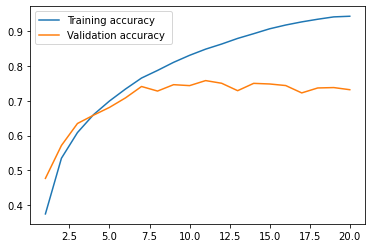

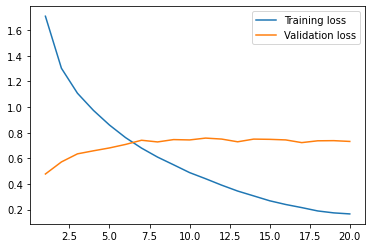

<Figure size 432x288 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_a = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, label = "Training accuracy")
plt.plot(epochs, val_a, label = "Validation accuracy ")
plt.legend()
plt.figure()
plt.plot(epochs, loss, label = "Training loss")
plt.plot(epochs, val_a, label = "Validation loss")
plt.legend()
plt.figure()